In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Import the Daset

In [2]:
data = pd.read_excel('ToyotaCorolla.xlsx')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
toyota = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyota.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


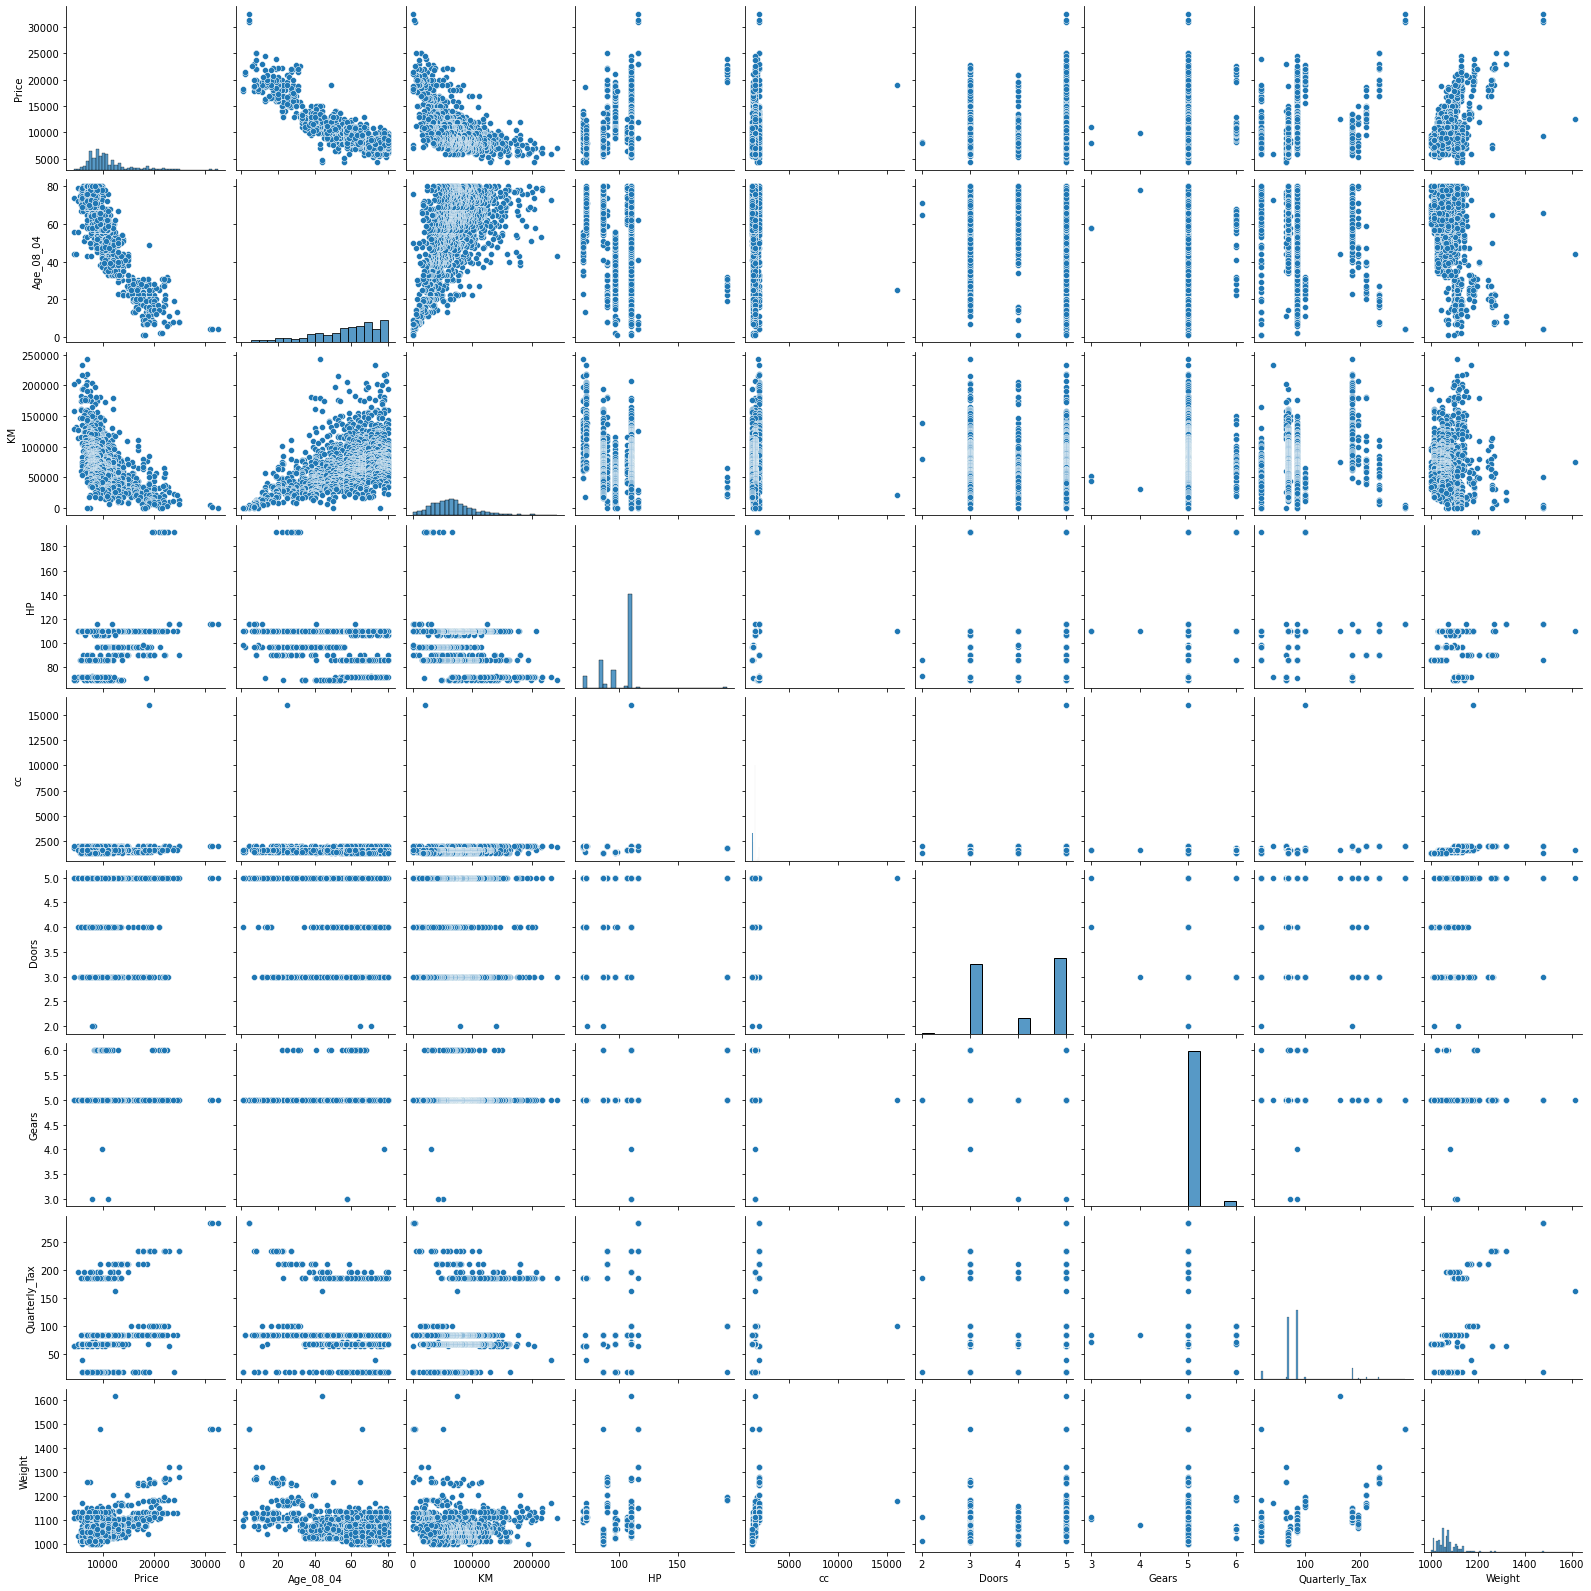

In [9]:
sns.pairplot(toyota)

In [10]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= toyota).fit()

In [11]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:01:29   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.rsquared

0.8637627463428192

In [14]:
toyota1 = toyota.drop(['Doors','Gears'],axis=1)

In [15]:
toyota1

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,69,1025
1432,10845,72,19000,86,1300,69,1015
1433,8500,71,17016,86,1300,69,1015
1434,7250,70,16916,86,1300,69,1015


In [16]:
# Creating Model

In [17]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight', data=toyota1).fit()

In [18]:
model1.params

Intercept       -2669.484315
Age_08_04        -121.792943
KM                 -0.020546
HP                 33.685785
cc                 -0.124385
Quarterly_Tax       4.192242
Weight             16.815621
dtype: float64

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:01:29   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2669.4843   1051.241     -2.539      0.011   -4731.625    -607.344
Age_08_04      -121.7929      2.622    -46.449      0.000    -126.937    -116.649
KM               -0.0205      0.001    -16.411      0.000      -0.023      -0.018
HP               33.6858      2.741     12.288      0.000      28.308      39.063
cc               -0.1244      0.090     -1.377      0.169      -0.302       0.053
Quarterly_Tax     4.1922      1.307      3.207      0.001       1.628       6.757
Weight           16.8156      1.036     16.239      0.000      14.784      18.847
==============================================================================
Omnibus:                      148.179   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.170
Skew:                          -0.220   Prob(JB):                    1.73e-207
Kurtosis:                       6.965   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

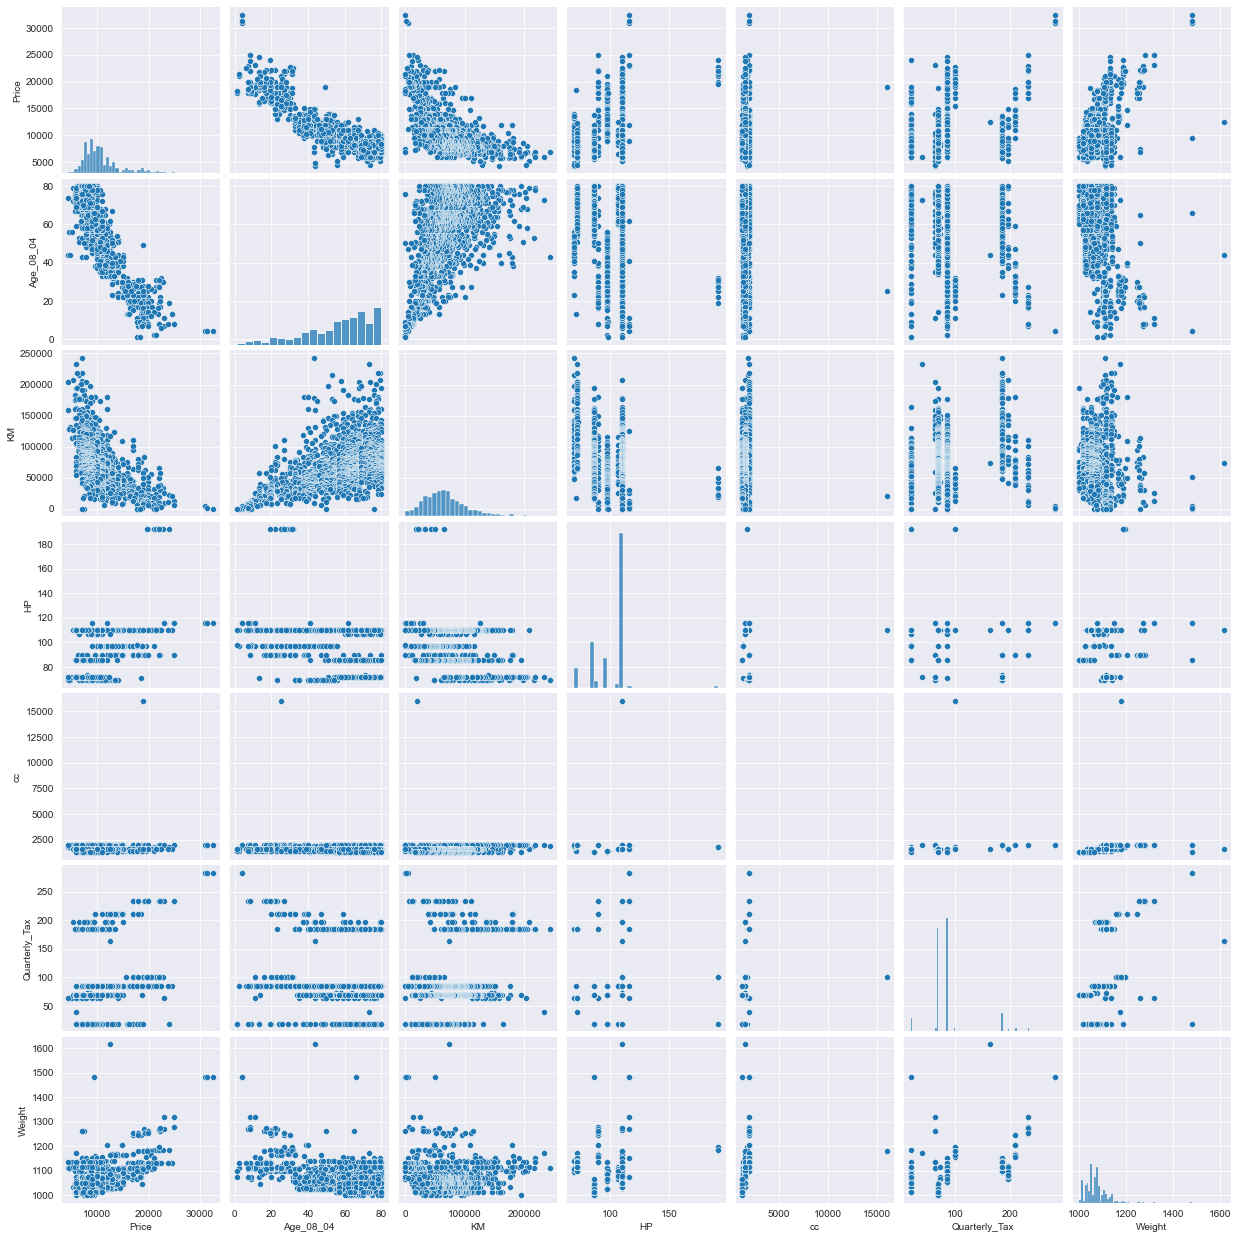

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

In [21]:
print(model1.pvalues)

Intercept         1.121062e-02
Age_08_04        7.864089e-288
KM                1.400419e-55
HP                4.599946e-33
cc                1.686173e-01
Quarterly_Tax     1.373227e-03
Weight            1.499666e-54
dtype: float64


In [22]:
model1.rsquared,model1.rsquared_adj

(0.8628570632699418, 0.8622812356839513)

# Calculating VIF

In [23]:
rsq_age = smf.ols('Age_08_04~Price+KM+HP+cc+Quarterly_Tax+Weight',data=toyota1).fit().rsquared

In [24]:
rsq_km = smf.ols('KM~Age_08_04+Price+HP+cc+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
rsq_HP = smf.ols('HP~Age_08_04+Price+KM+cc+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
rsq_cc = smf.ols('cc~Age_08_04+Price+KM+HP+Quarterly_Tax+Weight',data=toyota1).fit().rsquared
rsq_QT = smf.ols('Quarterly_Tax~Age_08_04+Price+KM+HP+cc+Weight',data=toyota1).fit().rsquared
rsq_Wt = smf.ols('Weight~Age_08_04+Price+KM+HP+cc+Quarterly_Tax',data=toyota1).fit().rsquared
rsq_Price = smf.ols('Price~Age_08_04+Price+HP+cc+Quarterly_Tax+Weight',data=toyota1).fit().rsquared

In [25]:
vif_age = 1/(1-rsq_km)
vif_km = 1/(1-rsq_km)
vif_HP = 1/(1-rsq_HP)
vif_cc = 1/(1-rsq_cc)
vif_QT = 1/(1-rsq_QT)
vif_Wt = 1/(1-rsq_Wt)
vif_price = 1/(1-rsq_Price)

C:\Users\DELL\AppData\Local\Temp/ipykernel_14016/835243751.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  vif_price = 1/(1-rsq_Price)


In [26]:
dvif = {'Variables': ['Age_08_04','Price','KM','HP','cc','Quarterly_Tax','Weight'], 'VIF': [vif_age,vif_price,vif_km,vif_HP,vif_cc,vif_QT,vif_Wt]}

In [27]:
vif_dframe = pd.DataFrame(dvif)

In [28]:
vif_dframe

,Variables,VIF
0,Age_08_04,2.075743
1,Price,inf
2,KM,2.075743
3,HP,1.477126
4,cc,1.164970
5,Quarterly_Tax,2.306732
6,Weight,2.787928


# Residual Analysis

# Test for Normality of residuals

In [29]:
model1.resid

0      -3317.422641
1      -2534.232763
2      -2854.009977
3      -1481.210143
4      -2473.303708
           ...     
1431   -1265.258578
1432    2581.553403
1433      73.997148
1434   -1299.850398
1435   -3442.906500
Length: 1436, dtype: float64

In [30]:
model1.fittedvalues

0       16817.422641
1       16284.232763
2       16804.009977
3       16431.210143
4       16223.303708
            ...     
1431     8765.258578
1432     8263.446597
1433     8426.002852
1434     8549.850398
1435    10392.906500
Length: 1436, dtype: float64

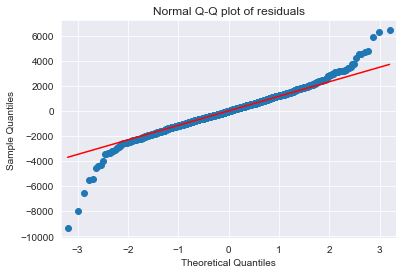

In [31]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [32]:
def get_Standardized_values(vals):
    return(vals- vals.mean())/ vals.std()

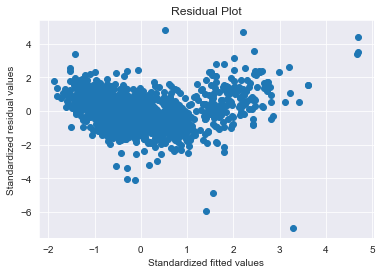

In [33]:
plt.scatter(get_Standardized_values(model1.fittedvalues),get_Standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Plot for Homoscedasticty

eval_env: 1


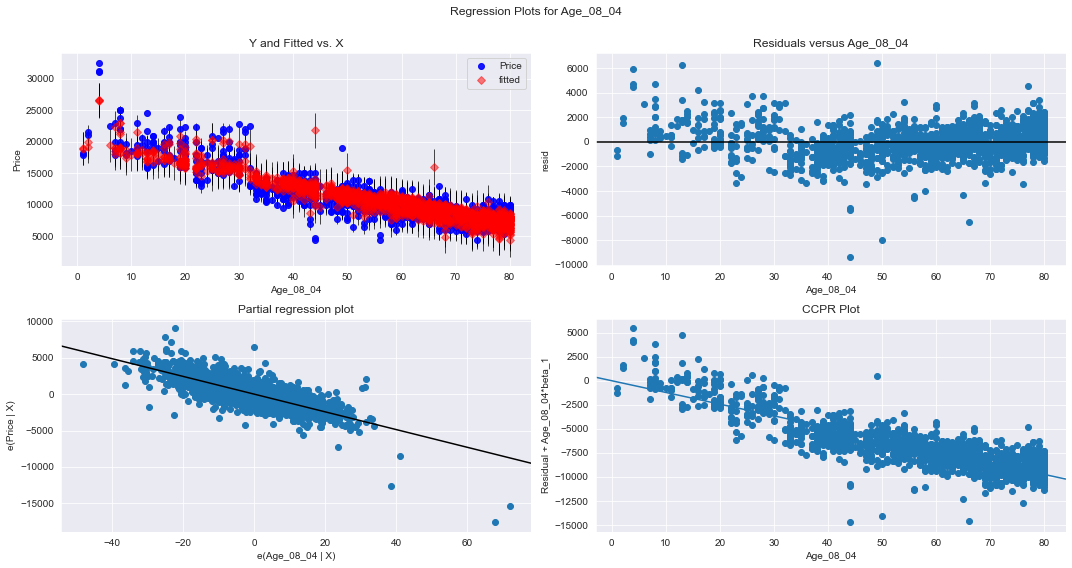

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'Age_08_04',fig=fig)
plt.show()

eval_env: 1


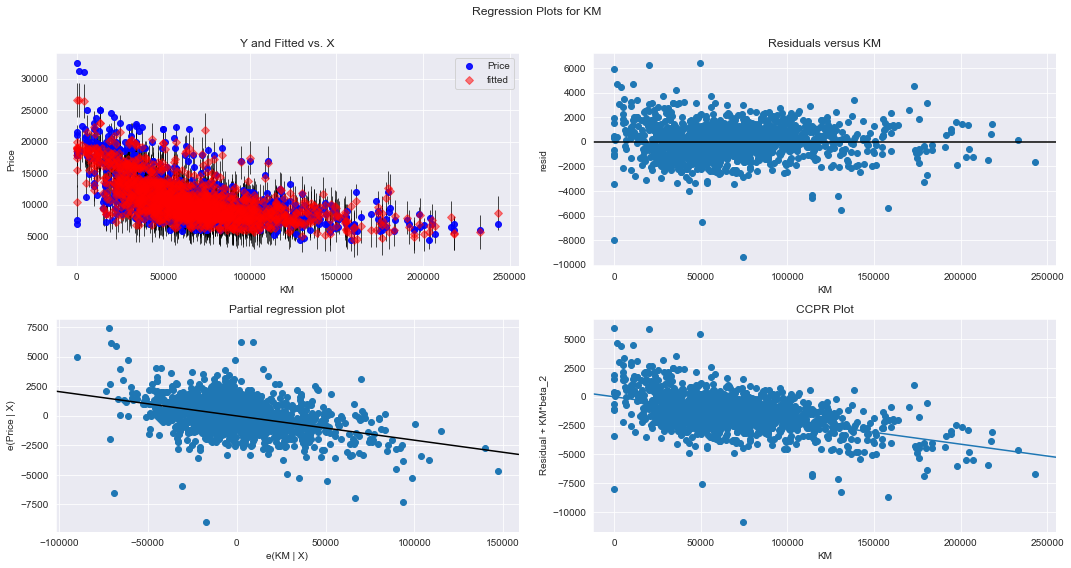

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'KM',fig=fig)
plt.show()

eval_env: 1


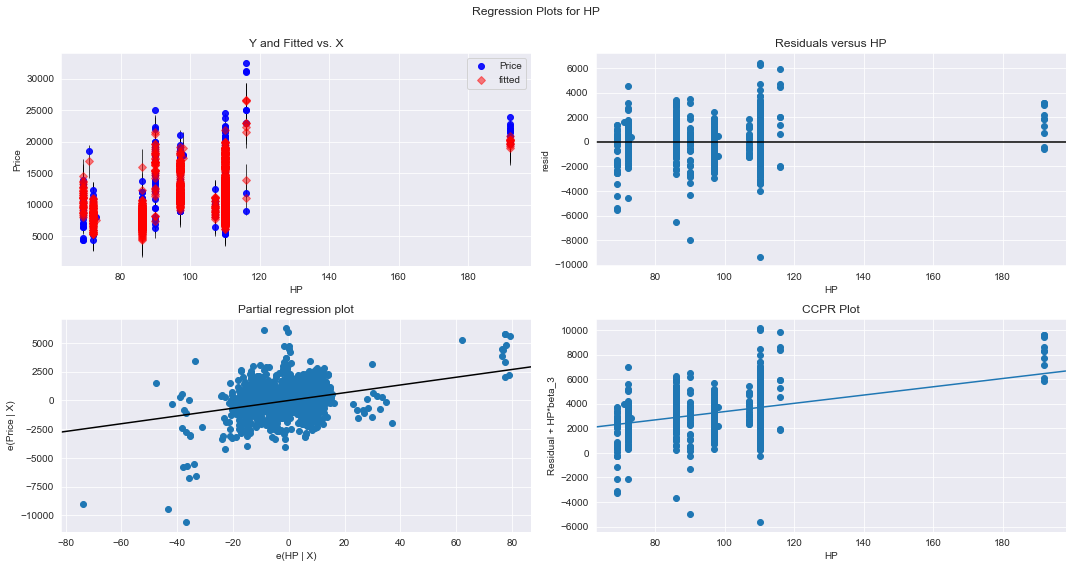

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'HP',fig=fig)
plt.show()

eval_env: 1


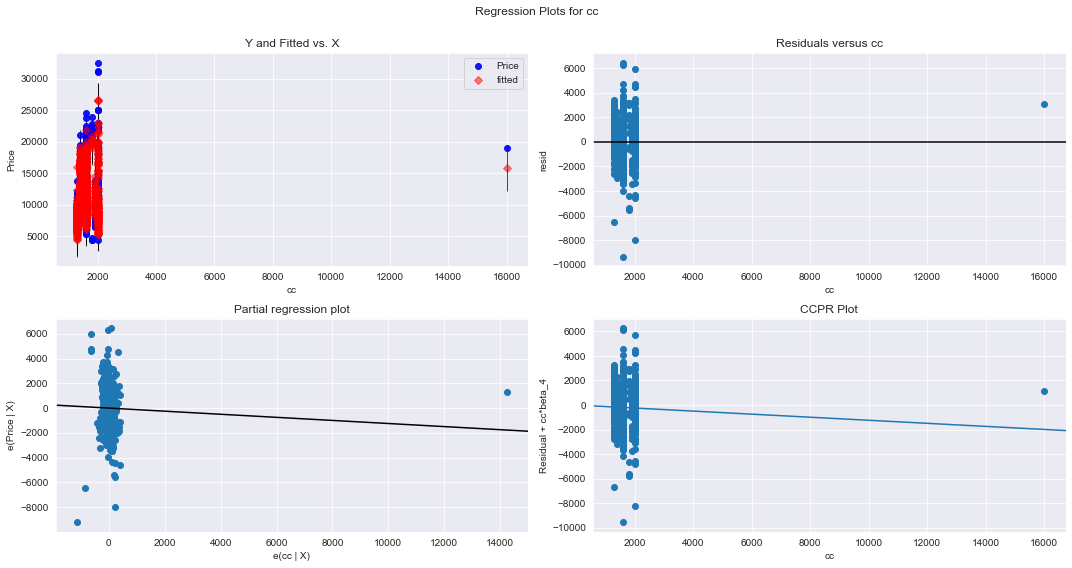

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'cc',fig=fig)
plt.show()

eval_env: 1


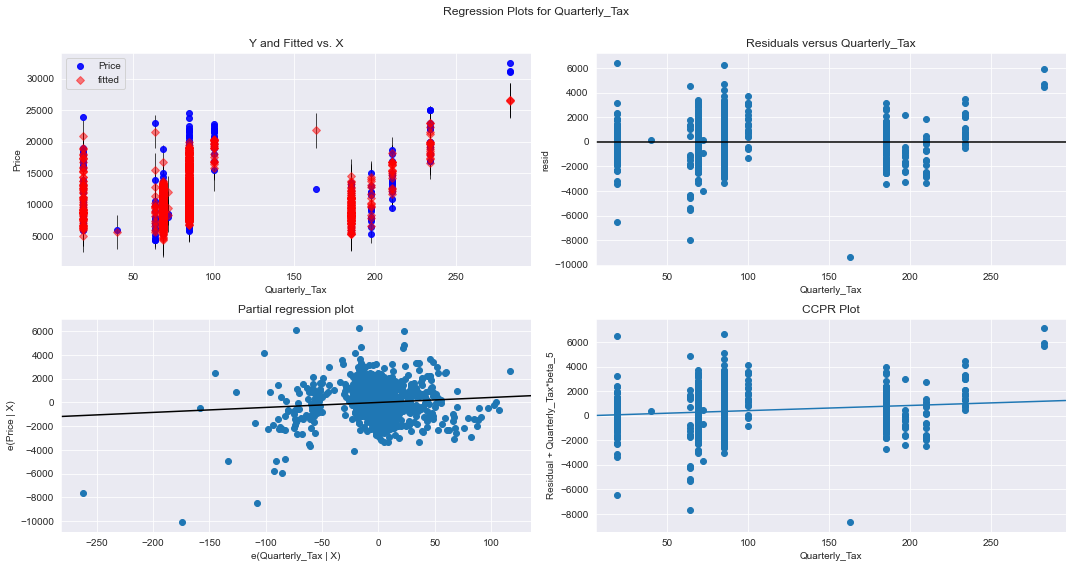

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


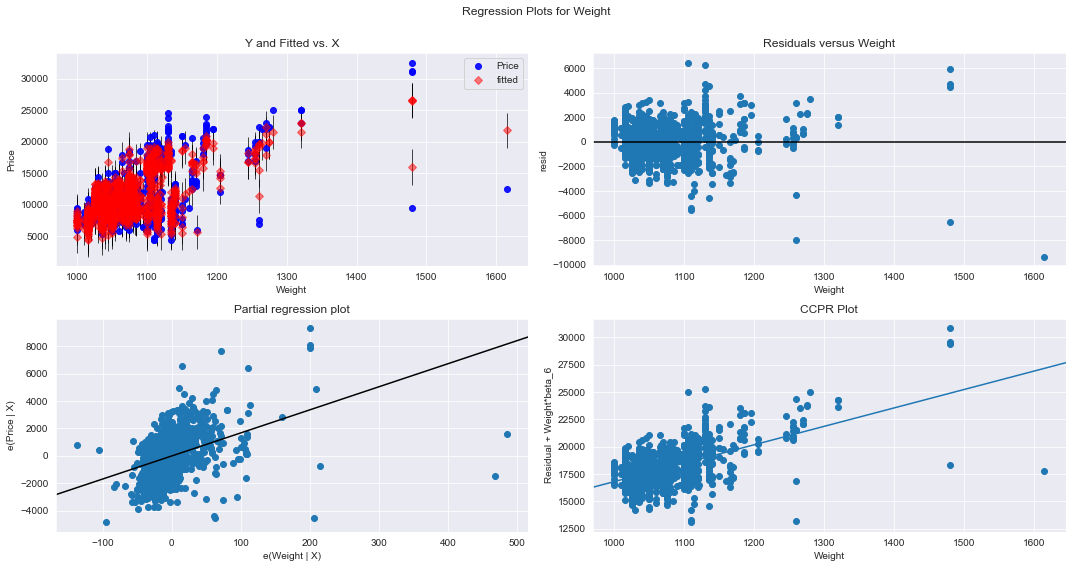

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1,'Weight',fig=fig)
plt.show()

# Model Deletion Process

   # Detecting Influencers / Outlers

In [40]:
model_influence = model1.get_influence()
(c,_)= model_influence.cooks_distance

In [41]:
c

array([7.94634117e-03, 4.31088094e-03, 6.02396204e-03, ...,
       2.67194643e-06, 8.05624057e-04, 1.35714526e-02])

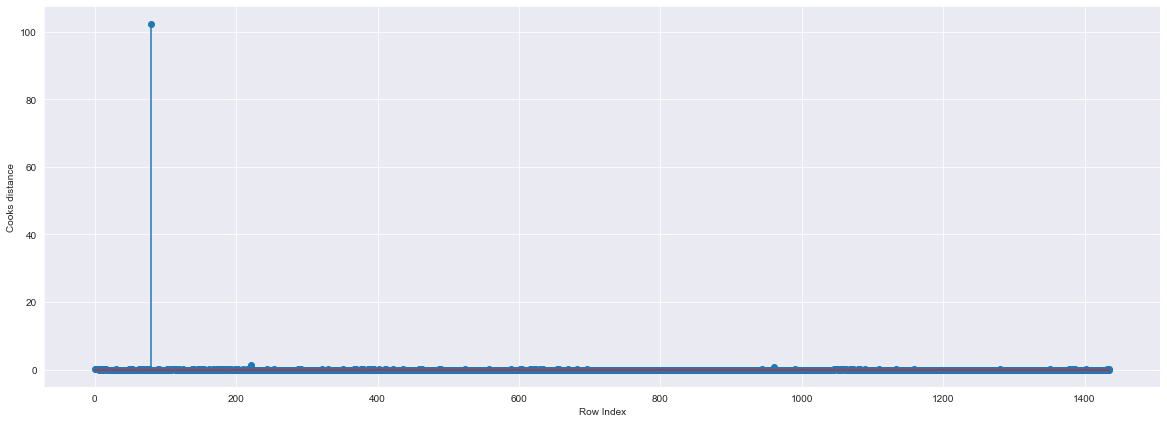

In [42]:
# Plot the influencers value using stem plot

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(80, 102.42006677699402)

In [44]:
k = data.shape[1]
n = data.shape[0]

In [45]:
print("k: ", k)
print("n:", n)

k:  38
n: 1436


In [46]:
threshold = 3*((k+1)/n)

In [47]:
threshold

0.08147632311977715

# High Influence Point

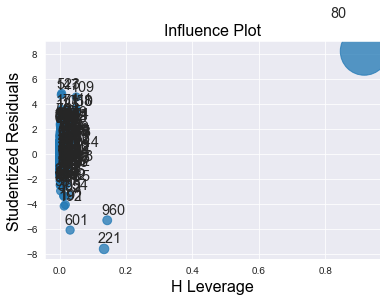

In [48]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [49]:
# from the plot
toyota1[toyota1.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,100,1180


# Improve the model


In [50]:
toyota_final = toyota1.drop(toyota1.index[[80]],axis=0).reset_index()

In [51]:
toyota_final

,index,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,210,1165
1,1,13750,23,72937,90,2000,210,1165
2,2,13950,24,41711,90,2000,210,1165
3,3,14950,26,48000,90,2000,210,1165
4,4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,69,1025
1431,1432,10845,72,19000,86,1300,69,1015
1432,1433,8500,71,17016,86,1300,69,1015
1433,1434,7250,70,16916,86,1300,69,1015


In [52]:
toyota_final = toyota_final.drop(['index'],axis=1)

In [53]:
toyota_final

,Price,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,210,1165
1,13750,23,72937,90,2000,210,1165
2,13950,24,41711,90,2000,210,1165
3,14950,26,48000,90,2000,210,1165
4,13750,30,38500,90,2000,210,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,69,1025
1431,10845,72,19000,86,1300,69,1015
1432,8500,71,17016,86,1300,69,1015
1433,7250,70,16916,86,1300,69,1015


# Again Building model

In [54]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Quarterly_Tax+Weight',data=toyota_final).fit()

In [55]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1573.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:01:59   Log-Likelihood:                -12339.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1428   BIC:                         2.473e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3643.4063   1034.489     -3.522      0.000   -5672.688   -1614.124
Age_08_04      -120.5692      2.568    -46.958      0.000    -125.606    -115.532
KM               -0.0176      0.001    -13.812      0.000      -0.020      -0.015
HP               41.0948      2.828     14.532      0.000      35.548      46.642
cc               -2.5355      0.307     -8.264      0.000      -3.137      -1.934
Quarterly_Tax     9.3512      1.424      6.565      0.000       6.557      12.145
Weight           19.8727      1.079     18.423      0.000      17.757      21.989
==============================================================================
Omnibus:                      238.534   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.164
Skew:                          -0.431   Prob(JB):                         0.00
Kurtosis:                       9.376   Cond. No.                     2.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
pred = pd.DataFrame()
pred['Age_08_04']=toyota_final.Age_08_04
pred['KM']= toyota_final.KM
pred['HP']=toyota_final.HP
pred['cc']=toyota_final.cc
pred['Quarterly_Tax'] = toyota_final.Quarterly_Tax
pred['Weight']= toyota_final.Weight
pred['Price']= toyota_final.Price
pred['pred_Price']= pd.DataFrame(final_model.predict(pred[['Age_08_04','KM','HP','cc','Quarterly_Tax','Weight']]))
pred

,Age_08_04,KM,HP,cc,Quarterly_Tax,Weight,Price,pred_Price
0,23,46986,90,2000,210,1165,13500,16499.031282
1,23,72937,90,2000,210,1165,13750,16042.001769
2,24,41711,90,2000,210,1165,13950,16471.361433
3,26,48000,90,2000,210,1165,14950,16119.465920
4,30,38500,90,2000,210,1170,13750,15903.859385
...,...,...,...,...,...,...,...,...
1430,69,20544,86,1300,69,1025,7500,8928.281670
1431,72,19000,86,1300,69,1015,10845,8395.039191
1432,71,17016,86,1300,69,1015,8500,8550.549094
1433,70,16916,86,1300,69,1015,7250,8672.879404
